In [ ]:
# Install your library here, for example the fynesse template
# is set up to be pip installable
%pip install git+https://github.com/jeffrey-22/ads.git
import os, fynesse
# 2 min

In [1]:
# Import local fynesse module. Do NOT run this cell if the notebook is not run from the repo - this is a quick hack for local runs
%load_ext autoreload
%autoreload 2
import os, sys, IPython
from pathlib import Path
try:
    notebook_path = Path(IPython.get_ipython().run_line_magic('pwd', '')).as_posix()
except AttributeError:
    notebook_path = Path(__file__).resolve().as_posix()
script_path = os.path.abspath(notebook_path)
project_path = os.path.abspath(os.path.join(script_path, '..'))
sys.path.append(project_path)
import fynesse

In [2]:
pp_database_conn = fynesse.access.DatabaseConnection.get_connection()

The schema stores price transaction data about the traded households.
- ```transaction_unique_identifier``` and ```db_id``` are indices for transactions and for our database respectively.
- ```price``` describes, in GBP, the price of the household.
- ```postcode```, ```primary_addressable_object_name```, ```secondary_addressable_object_name```, ```street```, ```locality```, ```town_city```, ```district```, ```county``` describe the address. We will ultimately only use the postcode to find the latitude and longitude.
- ```property_type``` describes one of: Detached, Semi-detached, Terraced, Flat/maisonette, Other, indicated by the initials.
- ```new_build_flag```, ```tenure_type```, ```ppd_category_type```, ```record_status``` likely describe some categories, but they are not very helpful as we are ultimately not given these when predicting.

We will do some sanity checks and general visualisation of the data in the address part.

In [ ]:
# Write the code you need for creating the table, downloading and uploading the data here. You can use as many code blocks as you need.
# Warning: run these once when populating the database. No need to run them again just for prediction!
# 20 min
os.makedirs("tmp_data", exist_ok=True)
downloaded_pathnames = fynesse.access.download_price_data()
print(f"Downloaded files: {downloaded_pathnames}")
fynesse.access.create_pp_table(pp_database_conn)
# 15m
fynesse.access.upload_files_to_table(pp_database_conn, downloaded_pathnames, 'pp_data')
# 11m
fynesse.access.setup_pp_table(pp_database_conn)

In [ ]:
# Warning: run these once when populating the database. No need to run them again just for prediction!
fynesse.access.create_postcode_table(pp_database_conn)
# 10s
postcode_filename = fynesse.access.download_postcode_data()
# 1m
fynesse.access.upload_files_to_table(pp_database_conn, [postcode_filename], 'postcode_data')
# 1m
fynesse.access.setup_postcode_table(pp_database_conn)

In [ ]:
# Warning: run these once when populating the database. No need to run them again just for prediction!
fynesse.access.create_prices_coordinates_table(pp_database_conn)
# 20m
joined_table_pathnames = fynesse.access.join_all_tables(downloaded_pathnames, postcode_filename, overwrite=False)
# 10m
fynesse.access.upload_files_to_table(pp_database_conn, joined_table_pathnames, 'prices_coordinates_data', ignore_first_row=True)
# 9m
fynesse.access.setup_prices_coordinates_table(pp_database_conn)

## Question 2. Accessing OpenStreetMap and Assessing the Available Features

In question 3 you will be given the task of constructing a prediction system for property price levels at a given location. We expect that knowledge of the local region around the property should be helpful in making those price predictions. To evaluate this we will now look at [OpenStreetMap](https://www.openstreetmap.org) as a data source.

The tasks below will guide you in accessing and assessing the OpenStreetMap data. The code you write will eventually be assimilated in your python module, but documentation of what you've included and why should remain in the notebook below.

Accessing OpenStreetMap through its API can be done using the python library `osmx`. Using what you have learned about the `osmx` interface in the lectures, write general code for downloading points of interest and other relevant information that you believe may be useful for predicting house prices. Remembering the perspectives we've taken on *data science as debugging*, the remarks we've made when discussing *the data crisis* of the importance of reusability in data analysis, and the techniques we've explored in the labsessions for visualising features and exploring their correlation use the notebook to document your assessment of the OpenStreetMap data as a potential source of data.

The knowledge you need to do a first pass through this question will have been taught by end of lab session three (16th November 2021). You will likely want to review your answer as part of *refactoring* your code and analysis pipeline shortly before hand in.

You should write reusable code that allows you to explore the characteristics of different points of interest. Looking ahead to question 3 you'll want to incorporate these points of interest in your prediction code.

*5 marks*


In [ ]:
# Use this cell and cells below for summarising your analysis and documenting your decision making.

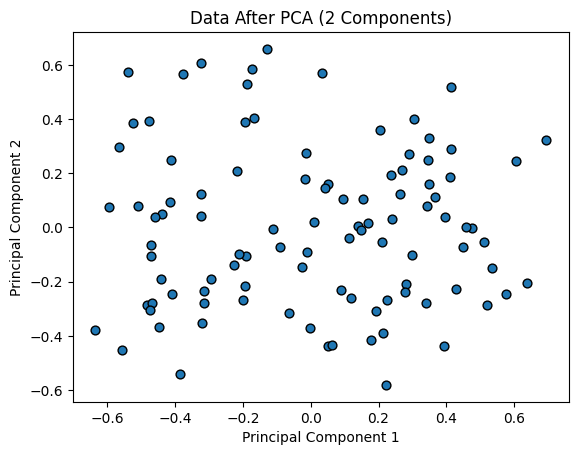

Explained Variance Ratio: [0.3007824  0.20965687]


## Model decisions

There are a total of X features, they are:
- latitude

Reasonings for the features:
- aaa

The model is a GLM, with a link of $f(x) = e^x$

Reasonings for the model:
- aaa

In [9]:
from datetime import date
fynesse.address.predict_price(52.206767, 0.119229, date(2023, 1, 1), 'S')

d:\Projects\ads\fynesse\assess.py:123: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  latitude, longitude FROM prices_coordinates_data\


## Large Language Models

If you used LLMs to generate or fix code in this assignment (recommended), briefly summarise the process and prompts you used. What do you think of the integration of LLMs in the data science pipeline?

```GIVE YOUR WRITTEN ANSWER HERE```

- Some other questions are answered in [this reddit forum](https://www.reddit.com/r/CST_ADS/) or [this doc](https://docs.google.com/document/d/1GfDROyUW8HVs2eyxmJzKrYGRdVyUiVXzPcDfwOO8wX0/edit?usp=sharing). Feel free to also ask about anything that comes up.